**Importing required packages**

In [ ]:
import json
import gzip
import pandas as pd
import gensim

**Downloading the dataset from Amazon Snap --> Cell Phones and Accessories**

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz

--2022-04-09 04:11:34--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169071325 (161M) [application/octet-stream]
Saving to: ‘Cell_Phones_and_Accessories_5.json.gz’

Cell_Phones_and_Acc 100%[===================>] 161.24M  84.5MB/s    in 1.9s    

2022-04-09 04:11:36 (84.5 MB/s) - ‘Cell_Phones_and_Accessories_5.json.gz’ saved [169071325/169071325]




**Retrieve 1 lakh records and making balanced dataset**

In [ ]:
reviews = []
sentiment = []
p=0
ng=0
emp=0
with gzip.open("/content/Cell_Phones_and_Accessories_5.json.gz") as f:
    for l in f:
      if p==50000 and ng==50000:
        break
      d=json.loads(l.strip())
      r=d.get("reviewText","")
      if r=="":
        emp+=1
        continue
      rating=int(d.get('overall'))
      if rating>=3 and p<50000:
        sentiment.append(1)
        reviews.append(r)
        p+=1
      elif rating<3 and ng<50000:
        sentiment.append(0)
        reviews.append(r)
        ng+=1

print(emp)
dataset={'Review':reviews,'Sentiment':sentiment}
df=pd.DataFrame(dataset)
df['Sentiment'].describe()

188


count    100000.000000
mean          0.500000
std           0.500003
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Sentiment, dtype: float64

In [ ]:
print(p,ng)

50000 50000


**Extracted reviews**

In [ ]:
df.head()

,Review,Sentiment
0,Looks even better in person. Be careful to not...,1
1,When you don't want to spend a whole lot of ca...,1
2,"so the case came on time, i love the design. I...",1
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,0
4,"I liked it because it was cute, but the studs ...",1


**Removing Stop words**

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
newreviews=[]
for line in reviews:
  newreviews.append(remove_stopwords(line))
newreviews[:10]

dataset={'Review':newreviews,'Sentiment':sentiment}
newdf=pd.DataFrame(dataset)
newdf.head()

,Review,Sentiment
0,Looks better person. Be careful drop phone rhi...,1
1,When don't want spend lot cash want great deal...,1
2,"case came time, love design. I'm actually miss...",1
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0
4,"I liked cute, studs fall easily protect phone ...",1


**Tokenization of reviews and simple preprocessing to remove accents and special characters**

In [ ]:
newdf['tokenized']=newdf['Review'].apply(simple_preprocess,deacc=True)
newdf.head()

,Review,Sentiment,tokenized
0,Looks better person. Be careful drop phone rhi...,1,"[looks, better, person, be, careful, drop, pho..."
1,When don't want spend lot cash want great deal...,1,"[when, don, want, spend, lot, cash, want, grea..."
2,"case came time, love design. I'm actually miss...",1,"[case, came, time, love, design, actually, mis..."
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0,"[don, care, for, it, gave, it, as, gift, and, ..."
4,"I liked cute, studs fall easily protect phone ...",1,"[liked, cute, studs, fall, easily, protect, ph..."


**Stemming the tokens of each reviews**

In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
newdf['stemmed']=[[porter_stemmer.stem(word) for word in tokens] for tokens in newdf['tokenized'] ]
newdf.head()

,Review,Sentiment,tokenized,stemmed
0,Looks better person. Be careful drop phone rhi...,1,"[looks, better, person, be, careful, drop, pho...","[look, better, person, be, care, drop, phone, ..."
1,When don't want spend lot cash want great deal...,1,"[when, don, want, spend, lot, cash, want, grea...","[when, don, want, spend, lot, cash, want, grea..."
2,"case came time, love design. I'm actually miss...",1,"[case, came, time, love, design, actually, mis...","[case, came, time, love, design, actual, miss,..."
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY ...,0,"[don, care, for, it, gave, it, as, gift, and, ...","[don, care, for, it, gave, it, as, gift, and, ..."
4,"I liked cute, studs fall easily protect phone ...",1,"[liked, cute, studs, fall, easily, protect, ph...","[like, cute, stud, fall, easili, protect, phon..."


**Dropping unwanted columns**

In [ ]:
newdf=newdf.drop(columns=["Review","tokenized"],axis=1)
newdf.head()

,Sentiment,stemmed
0,1,"[look, better, person, be, care, drop, phone, ..."
1,1,"[when, don, want, spend, lot, cash, want, grea..."
2,1,"[case, came, time, love, design, actual, miss,..."
3,0,"[don, care, for, it, gave, it, as, gift, and, ..."
4,1,"[like, cute, stud, fall, easili, protect, phon..."


**Splitting into Train and Test data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(newdf['stemmed'],newdf['Sentiment'],shuffle=True,test_size=0.1,random_state=1)

In [ ]:
X_train

61010    [thi, item, pretti, look, fit, well, interfer,...
77750                                     [pobr, telefono]
91401                                   [good, fast, ship]
42871    [thi, holder, work, move, car, car, star, get,...
16411    [feel, solid, hand, detach, usb, cabl, big, pl...
                               ...                        
50057    [road, bike, case, heavi, side, connector, sle...
98047    [ve, purchas, product, twice, batteri, charger...
5192                            [advertis, great, product]
77708    [charg, complet, offic, dai, arriv, brought, h...
98539    [us, car, it, cheapli, fall, right, phone, it,...
Name: stemmed, Length: 90000, dtype: object

**Define the word2vec model**


1.   Each word with 100 dimensions
2.   Window for skip gram is chosen as 3 (3 words before and after current word)
3.   Minimum length review = 1
4.   No. of threads = 4



In [ ]:
from gensim.models import Word2Vec
import time

dim = 100
window = 3
min_count = 1
workers = 4 #threads
sg = 1 # skip gram model =1
stemmed_tokens = pd.Series(newdf['stemmed']).values
print(stemmed_tokens)

[list(['look', 'better', 'person', 'be', 'care', 'drop', 'phone', 'rhineston', 'fall', 'duh', 'more', 'decor', 'case', 'protect', 'fit', 'perfectli', 'secur', 'phone', 'overal', 'pleas', 'purchas'])
 list(['when', 'don', 'want', 'spend', 'lot', 'cash', 'want', 'great', 'deal', 'thi', 'shop', 'bui', 'from'])
 list(['case', 'came', 'time', 'love', 'design', 'actual', 'miss', 'stud', 'notic', 'stud', 'bit', 'sloppi', 'bow', 'notic', 'haven', 'phone', 've', 'notic', 'far'])
 ...
 list(['rubber', 'case', 'fit', 'poorli', 'kept', 'week', 'couldn', 'bother', 'send', 'threw', 'out'])
 list(['aw', 'fit', 'everi', 'time', 'try', 'holster', 'start', 'come', 'off', 'veri', 'unhappi', 'thi', 'am', 'activ', 'look', 'case'])
 list(['the', 'phone', 'fell', 'flat', 'screen', 'ft', 'and', 'got', 'shatter', 'screen', 'cost', 'replac', 'ballis', 'letdown', 'stai', 'awai', 'case'])]


**Compile the word2vec model and save the model**

In [ ]:
model = Word2Vec(stemmed_tokens, min_count = min_count, size = dim, workers = workers, window = window, sg = sg)
model.save("/content/Cell_Phones_and_Accessories_wordvec.model")

In [ ]:
embedded_matrix=[]
vocab_size=len(model.wv.vocab)
words=list(model.wv.vocab.keys())
print(words)
print(len(words))
d=dict()
for w in words:
  try:
    embedded_matrix.append(model.wv[w])
  except:
    print("Word not found")

['look', 'better', 'person', 'be', 'care', 'drop', 'phone', 'rhineston', 'fall', 'duh', 'more', 'decor', 'case', 'protect', 'fit', 'perfectli', 'secur', 'overal', 'pleas', 'purchas', 'when', 'don', 'want', 'spend', 'lot', 'cash', 'great', 'deal', 'thi', 'shop', 'bui', 'from', 'came', 'time', 'love', 'design', 'actual', 'miss', 'stud', 'notic', 'bit', 'sloppi', 'bow', 'haven', 've', 'far', 'for', 'it', 'gave', 'as', 'gift', 'and', 'thei', 'were', 'okai', 'with', 'just', 'not', 'what', 'expect', 'like', 'cute', 'easili', 'recommend', 'the', 'product', 'exactli', 'pictur', 'nice', 'howev', 'dai', 'later', 'fell', 'apart', 'disappoint', 'qualiti', 'final', 'got', 'todai', 'took', 'forev', 'here', 'pic', 'right', 'wrote', 'review', 'start', 'off', 'packag', 'come', 'glue', 'opinion', 'good', 'coupl', 'if', 'that', 'wouldn', 'anoth', 'thank', 'none', 'jewel', 'fallen', 'glu', 'well', 'frame', 'given', 'happi', 'thing', 'know', 'is', 'carri', 'jean', 'tightli', 'big', 'you', 'worth', 'do', 'i

In [ ]:
m=len(stemmed_tokens[0])
for i in stemmed_tokens:
  l=len(i)
  if m<l:
    m=l
print(m)

1870


**Generate the word embeddings matrix**

In [ ]:
import numpy as np
embedded_matrix=np.array(model.wv)

**Transform each review to corresponding word vector embeddings**



**Each review is represented by 100 dimensional vector (Mean of all the word embeddings)**

Write the result to .csv file

In [ ]:
word2vec_filename ='train_review_word2vec_100.csv'
features = (newdf['stemmed'])
labels = newdf['Sentiment']
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in features.items():
        model_vector = (np.mean([model[token] for token in row], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Store the review embeddings to dataframe**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
word2vec_df = pd.read_csv(word2vec_filename)
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.162669,-0.017026,0.022052,-0.362541,0.124868,-0.212671,-0.010110,-0.004581,0.066894,-0.171200,...,-0.052254,-0.348141,-0.230176,0.345871,-0.285242,0.297463,0.095119,-0.216540,-0.464398,0.106511
1,-0.276344,0.047034,0.187174,-0.334016,0.063121,-0.283473,0.006351,-0.073473,0.042759,-0.081491,...,0.105477,-0.254459,-0.237380,0.294435,-0.269786,0.131933,0.066718,-0.148508,-0.422515,0.030108
2,-0.165766,0.007249,-0.051641,-0.446481,-0.011756,-0.095880,-0.007403,0.003315,0.058215,-0.067437,...,-0.097475,-0.235129,-0.179318,0.260485,-0.275674,0.209983,0.043285,-0.171001,-0.428230,0.037538
3,-0.274894,0.127083,0.101797,-0.220282,0.156718,-0.121782,0.047237,-0.037327,-0.000333,-0.070436,...,-0.017256,-0.344198,-0.141943,0.416642,-0.257616,0.207437,0.098587,-0.301965,-0.381891,-0.067421
4,-0.044000,-0.010314,0.014891,-0.348365,0.149941,-0.160740,0.027256,-0.082134,0.006059,-0.120696,...,0.041793,-0.398047,-0.251572,0.427803,-0.289859,0.228546,0.076157,-0.190935,-0.476397,0.139424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.137176,-0.133725,-0.016929,-0.407174,0.025475,-0.324147,-0.141786,0.053051,-0.005256,-0.152146,...,-0.075498,-0.377199,-0.364555,0.374179,-0.292456,0.289710,0.103159,-0.319892,-0.352612,0.186265
99996,-0.213608,-0.004448,0.128243,-0.170406,0.088224,-0.137237,-0.064775,0.058092,0.044948,-0.170116,...,0.013889,-0.382957,-0.117401,0.324253,-0.248368,0.172945,0.074613,-0.139774,-0.348896,0.074297
99997,-0.165956,0.064964,0.038857,-0.295089,-0.021471,-0.042833,-0.160646,0.074574,-0.000835,-0.166135,...,-0.031538,-0.414330,-0.111547,0.472529,-0.285094,0.154374,0.039560,-0.211438,-0.288677,0.186890
99998,-0.212497,0.019013,0.106182,-0.306642,-0.007832,-0.175018,0.068668,0.014663,0.049570,-0.093380,...,-0.045537,-0.214990,-0.181468,0.500240,-0.273859,0.214913,0.052696,-0.235370,-0.375188,0.109811


**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
clf_decision_word2vec = DecisionTreeClassifier()
features = word2vec_df
labels = newdf['Sentiment']
cross_val_score(DecisionTreeClassifier(),features,labels,cv=10)

array([0.6987, 0.7095, 0.712 , 0.7178, 0.7077, 0.7061, 0.718 , 0.6895,
       0.7152, 0.7037])

**SVM Classifier**

In [ ]:
from sklearn import svm
cross_val_score(svm.SVC(),features,labels,cv=10)

array([0.7998, 0.8124, 0.8416, 0.8352, 0.829 , 0.8207, 0.8356, 0.8188,
       0.8387, 0.8203])

**Random Forest Classifier**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100)
cross_val_score(rfmodel,features,labels,cv=10)


array([0.7816, 0.8093, 0.824 , 0.8132, 0.8102, 0.8033, 0.8204, 0.7923,
       0.806 , 0.8016])

**Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
features = word2vec_df
labels = newdf['Sentiment']
lrmodel = LogisticRegression(max_iter=1000)
cross_val_score(lrmodel,features,labels,cv=10)

array([0.7845, 0.8002, 0.8227, 0.8146, 0.8114, 0.8056, 0.8173, 0.7935,
       0.8118, 0.8036])

**ENSEMBLE MODEL (SVM + Logistic Regression + RandomForest)**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
word2vec_df = pd.read_csv(word2vec_filename)
rfmodel = RandomForestClassifier(n_estimators = 10)
lrmodel = LogisticRegression(max_iter=1000)
svmodel = svm.SVC()
ensemble_model = VotingClassifier(estimators=[('rf', rfmodel), ('lr', lrmodel), ('svm',svmodel )], voting='hard')
cross_val_score(ensemble_model,features,labels,cv=3)

array([0.80965381, 0.82293823, 0.81621816])

In [ ]:
ensemble_acc_wcv = np.mean([0.80965381, 0.82293823, 0.81621816])
ensemble_acc_wcv

0.8162700666666667

**Accuracy Values**

In [ ]:
dtacc = np.mean([0.6987, 0.7095, 0.712 , 0.7178, 0.7077, 0.7061, 0.718 , 0.6895,
       0.7152, 0.7037])
svmacc = np.mean([0.7998, 0.8124, 0.8416, 0.8352, 0.829 , 0.8207, 0.8356, 0.8188,
       0.8387, 0.8203])
rfacc = np.mean([0.7816, 0.8093, 0.824 , 0.8132, 0.8102, 0.8033, 0.8204, 0.7923,
       0.806 , 0.8016])
lracc = np.mean([0.7845, 0.8002, 0.8227, 0.8146, 0.8114, 0.8056, 0.8173, 0.7935,
       0.8118, 0.8036])
ensemacc = 0.83
print(dtacc,svmacc,rfacc,lracc,ensemacc)

0.7078200000000001 0.82521 0.80619 0.8065199999999999 0.83


***Comparison of Accuracy of various models --> Bar Chart***

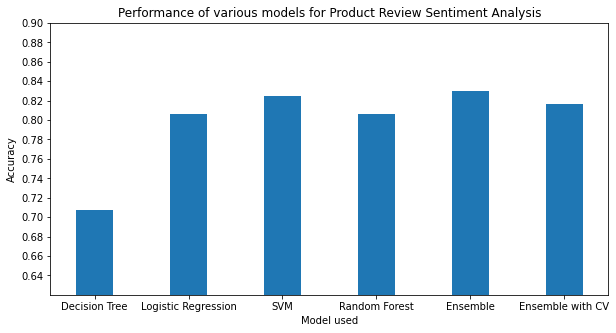

In [ ]:
import matplotlib.pyplot as plt
models = ["Decision Tree","Logistic Regression","SVM","Random Forest","Ensemble","Ensemble with CV"]
values = [dtacc,lracc,svmacc,rfacc,ensemacc,ensemble_acc_wcv]
fig = plt.figure(figsize = (10, 5))

plt.bar(models, values,width = 0.4)
plt.yticks([0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.80,0.82,0.84,0.86,0.88,0.90])
plt.ylim([0.62,0.90])
plt.xlabel("Model used")
plt.ylabel("Accuracy")
plt.title("Performance of various models for Product Review Sentiment Analysis")
plt.show()

**Final Results**

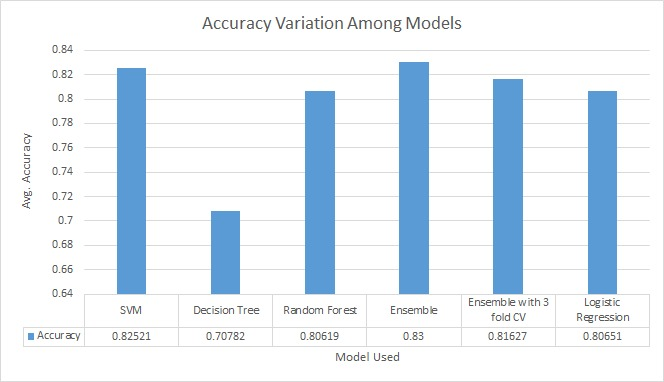